In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('fish.csv', sep=',',header=None)
df.head()

,0,1,2,3
0,1,14,25,620
1,2,28,25,1315
2,3,41,25,2120
3,4,55,25,2600
4,5,69,25,3110


In [3]:
#Note: the first column is just the index. Remove it.
df = df.iloc[:,1:4] #1:4 is the interval [1:4) - inclusive of 1, but exclusive of 4.
df.head()

,1,2,3
0,14,25,620
1,28,25,1315
2,41,25,2120
3,55,25,2600
4,69,25,3110


In [4]:
#We could add column names if we wanted
df.columns = ['fish age','water temparature','fish length']
df.head()

,fish age,water temparature,fish length
0,14,25,620
1,28,25,1315
2,41,25,2120
3,55,25,2600
4,69,25,3110


In [5]:
X = df.iloc[:,0:2] #No need to reshape: already have more than one value per row
y = df.iloc[:,2]

Text(0.5, 0, 'fish length')

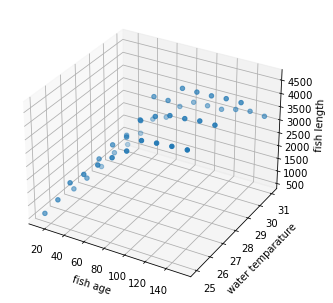

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X.iloc[:,0],X.iloc[:,1],y)

ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

In [7]:
from sklearn.metrics import mean_squared_error

reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)

print('Coefficients: {}'.format(reg.coef_))
print('Coefficient of determination: {}'.format(reg.score(X,y)))
print('MSE: {}'.format(mean_squared_error(y,reg.predict(X))))

Coefficients: [27.27954198 29.07413117]
Coefficient of determination: 0.7509201327837824
MSE: 429912.53462691384


In [8]:
#To plot a surface or grid, first generate a grid of the dependent variables...
import numpy as np

x1, x2 = np.mgrid[0:180:20,25:33:2]
print('x1')
print(x1)
print('')
print('x2')
print(x2)

x1
[[  0   0   0   0]
 [ 20  20  20  20]
 [ 40  40  40  40]
 [ 60  60  60  60]
 [ 80  80  80  80]
 [100 100 100 100]
 [120 120 120 120]
 [140 140 140 140]
 [160 160 160 160]]

x2
[[25 27 29 31]
 [25 27 29 31]
 [25 27 29 31]
 [25 27 29 31]
 [25 27 29 31]
 [25 27 29 31]
 [25 27 29 31]
 [25 27 29 31]
 [25 27 29 31]]


In [9]:
#...and then, based on our regression model, calculate the response variable value at each grid point.
y_plane = x1*reg.coef_[0]+x2*reg.coef_[1]
y_plane

array([[ 726.85327922,  785.00154156,  843.1498039 ,  901.29806623],
       [1272.44411887, 1330.5923812 , 1388.74064354, 1446.88890588],
       [1818.03495851, 1876.18322085, 1934.33148319, 1992.47974552],
       [2363.62579816, 2421.77406049, 2479.92232283, 2538.07058517],
       [2909.2166378 , 2967.36490014, 3025.51316248, 3083.66142482],
       [3454.80747745, 3512.95573979, 3571.10400212, 3629.25226446],
       [4000.39831709, 4058.54657943, 4116.69484177, 4174.84310411],
       [4545.98915674, 4604.13741908, 4662.28568141, 4720.43394375],
       [5091.57999638, 5149.72825872, 5207.87652106, 5266.0247834 ]])

Text(0.5, 0, 'fish length')

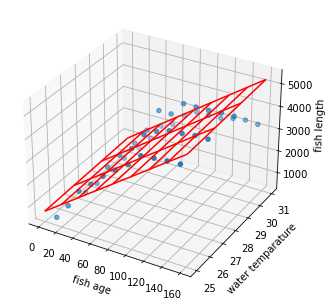

In [10]:
fig = plt.figure()
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X.iloc[:,0],X.iloc[:,1],y)
#We can use plot_surface, but I think that a wireframe is clearer: it doesn't obscure the points.
ax.plot_wireframe(x1,x2,y_plane,color='red')


ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

array([[<AxesSubplot:xlabel='fish age', ylabel='fish age'>,
        <AxesSubplot:xlabel='water temparature', ylabel='fish age'>,
        <AxesSubplot:xlabel='fish length', ylabel='fish age'>],
       [<AxesSubplot:xlabel='fish age', ylabel='water temparature'>,
        <AxesSubplot:xlabel='water temparature', ylabel='water temparature'>,
        <AxesSubplot:xlabel='fish length', ylabel='water temparature'>],
       [<AxesSubplot:xlabel='fish age', ylabel='fish length'>,
        <AxesSubplot:xlabel='water temparature', ylabel='fish length'>,
        <AxesSubplot:xlabel='fish length', ylabel='fish length'>]],
      dtype=object)

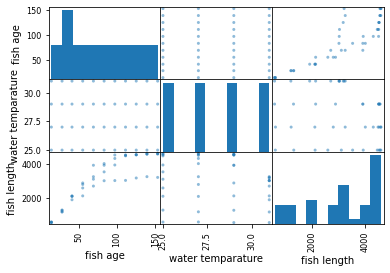

In [11]:
#3D plots can be difficult to interpret. We can complement them with a scatter matrix (often used at an
#earlier stage in the process).
pd.plotting.scatter_matrix(df)